<a href="https://colab.research.google.com/github/MoisesMartinPerez/dataset-examen/blob/main/SNS_ACT3_3_Nasser_Mois%C3%A9s_Mart%C3%ADn_P%C3%A9rez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autor: Nasser Moisés Martín Pérez

--- Evaluación de Modelos sin Cross Validation ---
GaussianNB: Precisión = 0.98


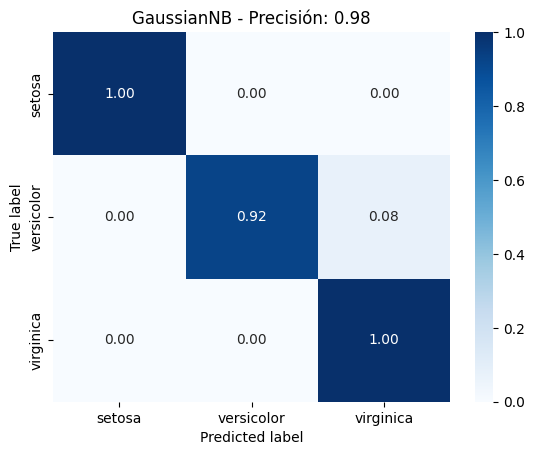

MultinomialNB: Precisión = 0.96


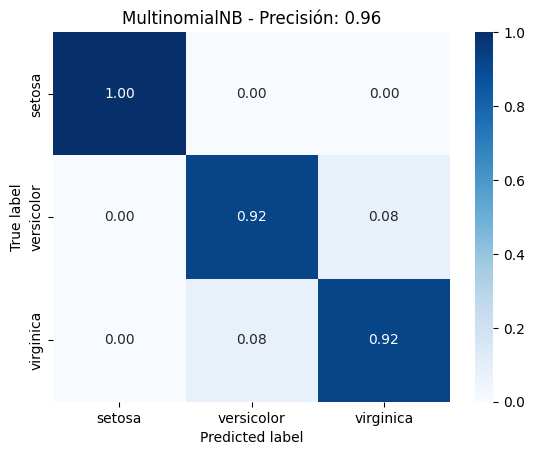

ComplementNB: Precisión = 0.71


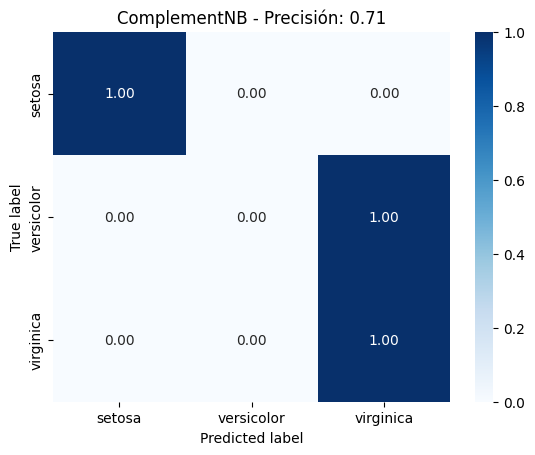

BernoulliNB: Precisión = 0.29


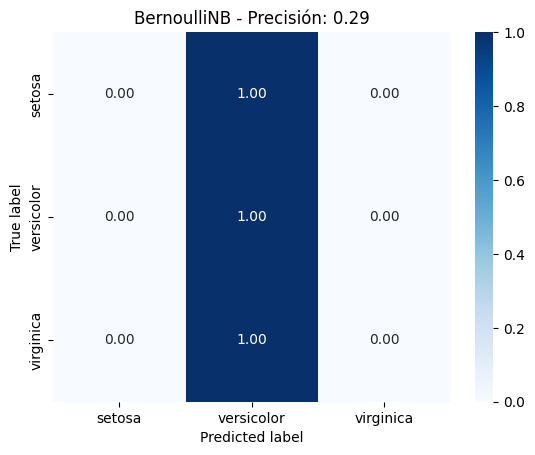

CategoricalNB: Precisión = 0.96


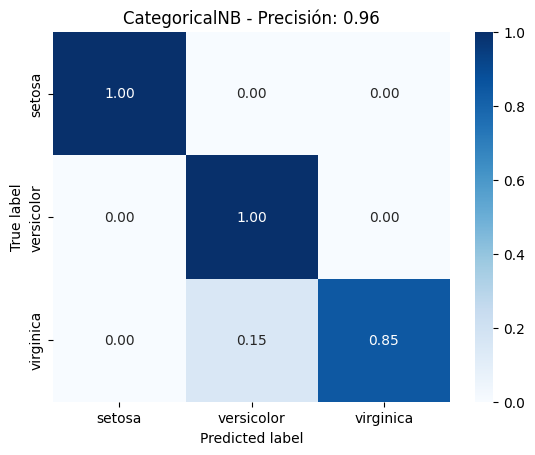


--- Evaluación de Modelos con Cross Validation (CV=5) ---
GaussianNB: Precisión con CV = 0.95 (+/- 0.03)
MultinomialNB: Precisión con CV = 0.95 (+/- 0.05)
ComplementNB: Precisión con CV = 0.67 (+/- 0.00)
BernoulliNB: Precisión con CV = 0.33 (+/- 0.00)
CategoricalNB: Precisión con CV = 0.93 (+/- 0.06)

Comparación Final de Resultados:
GaussianNB: {'Accuracy without CV': 0.9777777777777777, 'Accuracy with CV': 0.9533333333333334}
MultinomialNB: {'Accuracy without CV': 0.9555555555555556, 'Accuracy with CV': 0.9533333333333334}
ComplementNB: {'Accuracy without CV': 0.7111111111111111, 'Accuracy with CV': 0.6666666666666666}
BernoulliNB: {'Accuracy without CV': 0.28888888888888886, 'Accuracy with CV': 0.3333333333333333}
CategoricalNB: {'Accuracy without CV': 0.9555555555555556, 'Accuracy with CV': 0.9266666666666667}


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Función para graficar matrices de confusión
def plot_confusion_matrix(y_test, y_pred, title, labels):
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Cargar el dataset Iris
data = load_iris()
X, y = data.data, data.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar clasificadores Naive Bayes
classifiers = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

# Resultados para comparación
results = {}

print("--- Evaluación de Modelos sin Cross Validation ---")
for name, clf in classifiers.items():
    try:
        # Entrenamiento y predicción sin Cross Validation
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {"Accuracy without CV": accuracy}

        # Graficar matriz de confusión
        print(f"{name}: Precisión = {accuracy:.2f}")
        plot_confusion_matrix(y_test, y_pred, title=f"{name} - Precisión: {accuracy:.2f}", labels=data.target_names)
    except Exception as e:
        results[name] = {"Error": str(e)}

print("\n--- Evaluación de Modelos con Cross Validation (CV=5) ---")
for name, clf in classifiers.items():
    try:
        # Evaluación con Cross Validation
        cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        results[name]["Accuracy with CV"] = np.mean(cv_scores)
        print(f"{name}: Precisión con CV = {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")
    except Exception as e:
        results[name]["Error con CV"] = str(e)

# Mostrar comparación final
print("\nComparación Final de Resultados:")
for name, scores in results.items():
    print(f"{name}: {scores}")
